# Data preparation 
Import the necessary libraries and load the datasets.

In [3]:
# Libraries for data preparation & visualization
import numpy as np
import seaborn as sns
import pandas as pd
# import plotly.io as pio
import matplotlib.pyplot as plt
# pio.renderers.default = "png"

# Ignore printing warnings for general readability
import warnings 
warnings.filterwarnings("ignore")

In [4]:
book_path = "./dataset/BX-Books"

In [5]:
# Fix the &amp; and other HTML escape sequences
import html
import os
print(os.getcwd())

raw_book_path = book_path
book_path = "./dataset/BX-Books-HTMLfixed" # If file isn't fixed yet
if not os.path.isfile(f'{book_path}.csv'):
    with open(f'{raw_book_path}.csv', 'r', encoding='latin-1') as f, open(f'{book_path}.csv', 'w') as g:
        content = html.unescape(f.read())
        g.write(content)
        print("Fixed file {0}.csv".format(raw_book_path))

C:\Users\Legion\Downloads\b\1INTRO2AI\GithubDesktop\book-rec


In [6]:
# Loading the dataset 
def loaddata(filename):
    df = pd.read_csv(f'{filename}.csv',sep=';', encoding='latin-1', escapechar='\\', error_bad_lines=False, warn_bad_lines=False,)
    return df

book   = loaddata(book_path)
user   = loaddata("./dataset/BX-Users")
rating = loaddata("./dataset/BX-Book-Ratings")

# Data Description

In [7]:
print("shape of Users :",user.shape)
print("shape of books :",book.shape)
print("shape of ratings :",rating.shape)

shape of Users : (278858, 3)
shape of books : (271379, 8)
shape of ratings : (1149780, 3)


In [8]:
book

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271374,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271375,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271376,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271377,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [9]:
user

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [10]:
rating

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [11]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271379 entries, 0 to 271378
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271379 non-null  object
 1   Book-Title           271379 non-null  object
 2   Book-Author          271378 non-null  object
 3   Year-Of-Publication  271379 non-null  int64 
 4   Publisher            271377 non-null  object
 5   Image-URL-S          271379 non-null  object
 6   Image-URL-M          271379 non-null  object
 7   Image-URL-L          271379 non-null  object
dtypes: int64(1), object(7)
memory usage: 16.6+ MB


In [12]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [13]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [14]:
# Check for duplicate values
print(f'Duplicate entries book: {book.duplicated().sum()}')
print(f'Duplicate entries rating: {rating.duplicated().sum()}')
print(f'Duplicate entries user: {user.duplicated().sum()}')

Duplicate entries book: 0
Duplicate entries rating: 0
Duplicate entries user: 0


In [15]:
# Missing value 
print(book.isnull().sum())
print("="*35)
print(rating.isnull().sum())
print("="*35)
print(user.isnull().sum())

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64
User-ID        0
ISBN           0
Book-Rating    0
dtype: int64
User-ID          0
Location         0
Age         110762
dtype: int64


# Data cleaning
<h4>Checking and cleaning book data</h4>

In [16]:
# There are missing values in these two columns so we need to fill them
book.loc[book['Book-Author'].isnull(), 'Book-Author'] = "No author"
book.loc[book['Publisher'].isnull(), 'Publisher'] = "Other"

In [17]:
book['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984,    0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, 2012, 2006, 1909, 2008, 1378,
       1919, 1922, 1897, 2024, 1376, 2037], dtype=int64)

In [18]:
# Since year data has the year 0 and >2022 which is invalid, we shall convert it into null data
book.loc[(book['Year-Of-Publication'] > 2022) | (book['Year-Of-Publication'] == 0), 'Year-Of-Publication'] = np.NAN

# Replacing null data with median 
book['Year-Of-Publication'].fillna(book['Year-Of-Publication'].median() , inplace = True)
print(book['Year-Of-Publication'].isna().sum())

# Convert it back to int
book['Year-Of-Publication'] = book['Year-Of-Publication'].astype(np.int64)

0


In [19]:
book['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 1968, 1961, 1958, 1974, 1976,
       1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960, 1966,
       1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954, 1950,
       1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011, 1925,
       1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 1911, 1904,
       1949, 1932, 1928, 1929, 1927, 1931, 1914, 1934, 1910, 1933, 1902,
       1924, 1921, 1900, 1944, 1917, 1901, 2010, 1908, 1906, 1935, 1806,
       2021, 2012, 2006, 1909, 2008, 1378, 1919, 1922, 1897, 1376],
      dtype=int64)

<h4>Checking and cleaning user data</h4>

In [20]:
print(sorted(user['Age'].unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

<p>A lot of values from 'Age' column is missing and some others are too low or too high for an average person (200 years old).</p>

In [21]:
# Removing age above 120 and below 4
user.loc[(user['Age'] > 120) | (user['Age'] < 4) , 'Age' ] = np.NAN
user['Age'].isna().sum()

111694

In [22]:
# Filling the null values with mean
user['Age'].fillna(user['Age'].mean(), inplace = True)
user['Age'] = user['Age'].astype(np.int64)

In [23]:
print(sorted(user['Age'].unique()))

[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 113, 114, 115, 116, 118, 119]


# Data processing 

In [24]:
# Preprocessing Data
book = book[['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher']]
book.rename(columns = {'Book-Title':'title', 'Book-Author':'author', 'Year-Of-Publication':'year', 'Publisher':'publisher'}, inplace=True)
user.rename(columns = {'User-ID':'user_id', 'Location':'location', 'Age':'age'}, inplace=True)
rating.rename(columns = {'User-ID':'user_id', 'Book-Rating':'rating'}, inplace=True)

# Exploratory data analysist
Analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods


## Rating distribution

<AxesSubplot: title={'center': '\nRating counts\n'}, xlabel='rating', ylabel='count'>

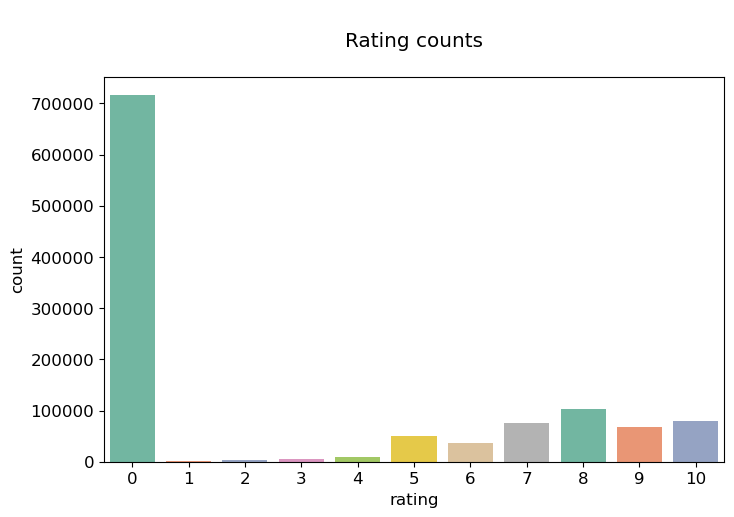

In [25]:
plt.figure(figsize=[8,5])
plt.rc('font', size=12)
plt.title('\nRating counts\n')
sns.countplot(x='rating',data=rating, palette = 'Set2')

<ul>
<li>This countplot shows users have rated 0 the most, which means they haven't rated books at all.
<li>Still we can see pattern to recognize in ratings from 1-10.
<li>
    Mostly the users have rated 8 ratings out of 10 as per books. It might happen that the feedback is positive but not extremely positive as 10 ratings (i.e best books ever).

In [26]:
# Ratings should only exist for the books and users given in the dataset
ratings_new = rating[rating.ISBN.isin(book.ISBN)]
ratings_new = ratings_new[ratings_new.user_id.isin(user.user_id)]
print(rating.shape)
print(ratings_new.shape)

(1149780, 3)
(1031175, 3)


In [27]:
# Calculate sparsity of the ratings
sparsity = 1.0 - len(ratings_new)/float(len(user)*len(book))
print("The sparsity level of the ratings dataset is", 100*sparsity, '%')

The sparsity level of the ratings dataset is 99.99863738542713 %


In [28]:
# Ratings with 0 rating and without 0 rating ( in rating data includes books given in the dataset )
ratings_explicit=ratings_new[ratings_new['rating'] != 0]
ratings_implicit=ratings_new[ratings_new['rating'] == 0]
print(ratings_new.shape)
print(ratings_explicit.shape)
print(ratings_implicit.shape)

(1031175, 3)
(383852, 3)
(647323, 3)


<AxesSubplot: title={'center': '\nMost popular ratings\n'}, xlabel='rating', ylabel='count'>

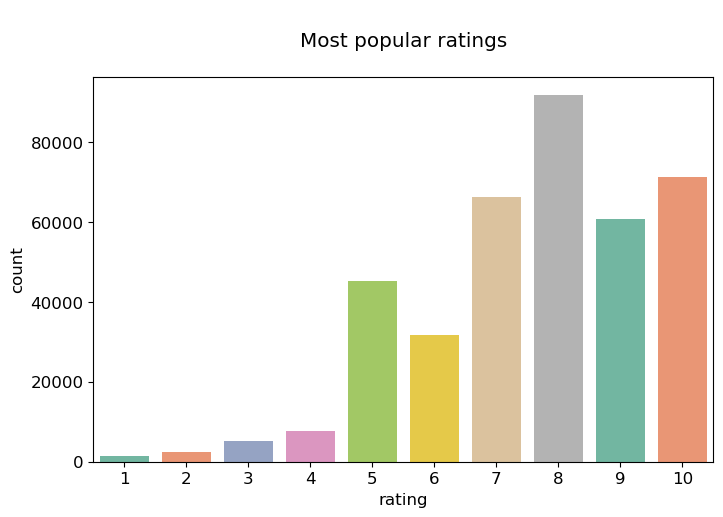

In [29]:
# Most popular rating without 0 rating
# Visualising Explicit Rating Counts
plt.figure(figsize=[8,5])
plt.rc('font', size=12)
plt.title('\nMost popular ratings\n')
sns.countplot(data=ratings_explicit, x='rating', palette='Set2')

#### Now this countplot of book rating indicates that higher ratings are more common amongst users and rating 8 has been rated highest number of times. There can be many assumptions based on ratings of users:
<ul>
<li>Let's take ratings group from 1-4. This can be negative impact for books been published if they have ratings from 1 to 4. It can be issues related to - 1. Language 2. Offend by any chapter's incident/paragraph/Author 3. They've read worst book ever.

<li>If we think analytical about rating 5, it might happen some same reason as above key points mention.

<li>For 5 ratings the users might not sure about book ratings whether it's positive or negative impact.

<li>Let's take ratings group from 6-10. This are positive feedback - 1. It can happen that not every book is perfect in all desire. So, the user's have decided to rate 8.
2. Since 6 ratings is very low among other ratings. 3. As we can aspect 7 and 8 are average and more ratings from users. 4. 9 and 10 ratings are top best ratings based on Author's, Publisher's and Books been published.



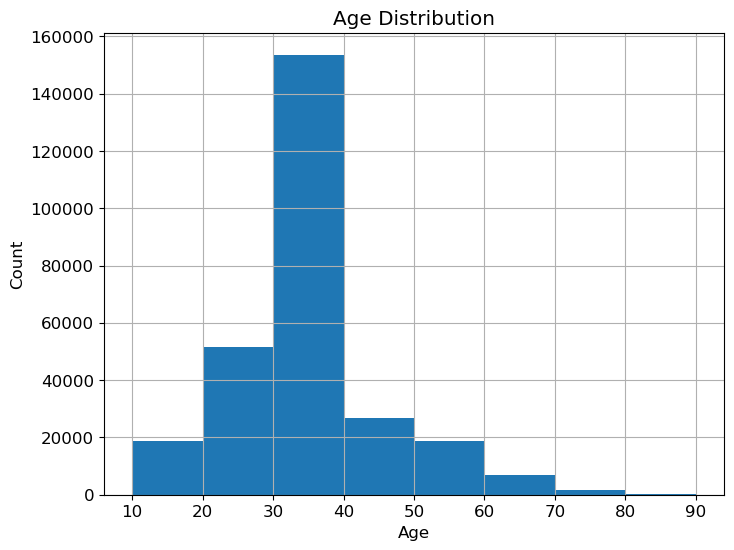

In [30]:
plt.figure(figsize=(8,6))
user.age.hist(bins=[10*i for i in range(1, 10)])     
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

  Looking towards the users age between $30-40$ prefer more and somewhat we can also view between $20-30$. Let's make some hypothesis analysis:
<ul>
<li>It is obvious that most of the user books are from Age $30$ to $40$.
<li>It might happen that the users are more interested on that subject what Authors are publishing in the market.
<li>The age group between $20-30$ are immensely attracted to read books published by Author.
<li>We can observe same pitch for Age group between $10-20$ and $50-60$. There are can be lot of different reasons.

In [31]:
# Merge ratings with books
rating_with_books = ratings_new.merge(book, on='ISBN')
rating_with_books.head()

,user_id,ISBN,rating,title,author,year,publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books


In [32]:
rating_with_books.groupby('title')['rating'].count().reset_index().sort_values(by='rating', ascending=False)[:10]

,title,rating
235143,Wild Animus,2502
196530,The Lovely Bones: A Novel,1295
183775,The Da Vinci Code,898
5482,A Painted House,838
199441,The Nanny Diaries: A Novel,828
28102,Bridget Jones's Diary,815
206706,The Secret Life of Bees,774
53164,Divine Secrets of the Ya-Ya Sisterhood: A Novel,740
204591,The Red Tent (Bestselling Backlist),723
14571,Angels & Demons,670


<AxesSubplot: title={'center': '\nMost popular books\n'}, xlabel='Count', ylabel='title'>

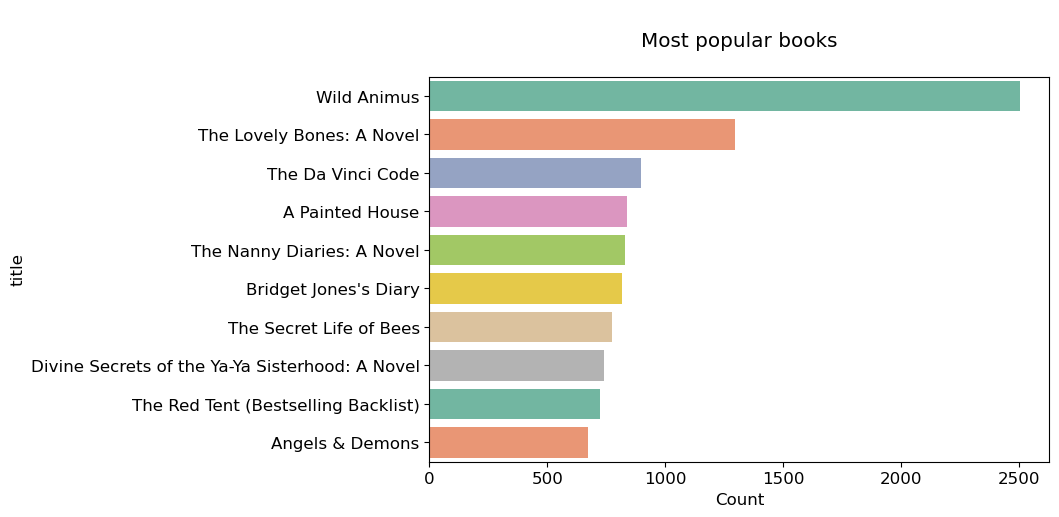

In [33]:
# Top 10 most popular books
popular = rating_with_books.groupby('title')['rating'].count().reset_index().sort_values(by='rating', ascending=False)[:10]
popular.columns = ['title', 'Count']

plt.figure(figsize=[8, 5])
plt.rc('font', size=12)
plt.title('\nMost popular books\n')
sns.barplot(data=popular, y='title', x='Count',palette='Set2')

<AxesSubplot: title={'center': '\nMost popular Authors\n'}, xlabel='rating', ylabel='author'>

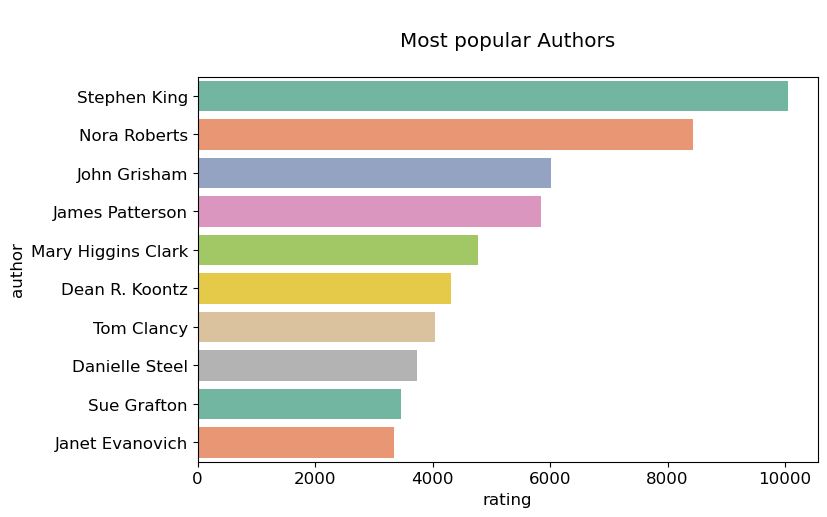

In [34]:
# Most popular book authors
author = rating_with_books.groupby('author')['rating'].count().reset_index().sort_values(by='rating', ascending=False)[:10]
plt.figure(figsize=[8, 5])
plt.rc('font', size=12)
plt.title('\nMost popular Authors\n')
sns.barplot(data=author, y='author', x='rating',palette='Set2')

<AxesSubplot: title={'center': '\nTop 10 authors with the most books\n'}, xlabel='count', ylabel='authors'>

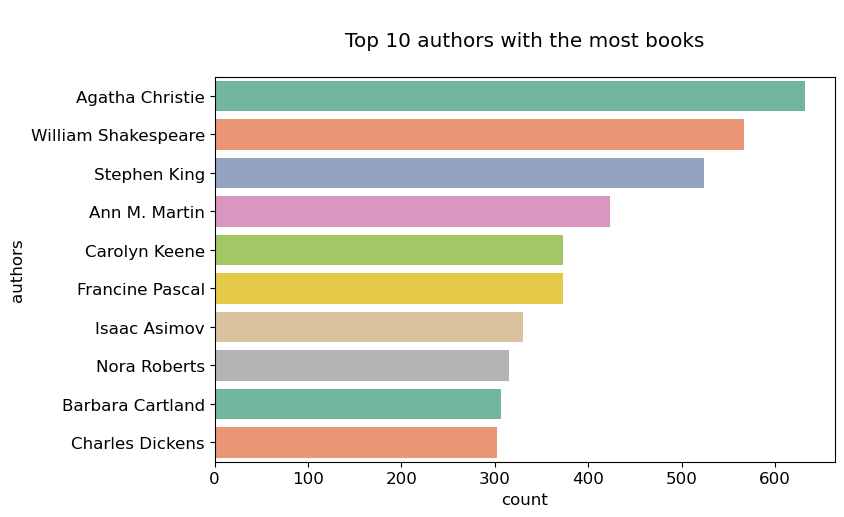

In [35]:
# Authors with the most books
authors = book['author'].value_counts()
top_authors = authors.head(10).reset_index()
top_authors.columns = ['authors', 'count']
plt.figure(figsize=[8, 5])
plt.rc('font', size=12)
plt.title('\nTop 10 authors with the most books\n')
sns.barplot(x=top_authors['count'], y=top_authors['authors'],
            palette='Set2', )

Agatha Christie is leading at top with more than 600 counts, followed by William Shakespeare. We can plot some hypothesis point<br>
<ul>
<li>It can happen in some possible cases that Agatha Christie is not a best Author, though Agatha Christie has most number of books as compared to others.
<li>William Shakespeare is one of the popular Author in the world. Still he doesn't have highest number of books.
<li>Among all other Authors, it might happen that few of the Author might have some of the best seller books who have millions of copies been sold in world.
</ul>

<AxesSubplot: title={'center': '\nTop 10 publishers with the most books\n'}, xlabel='count', ylabel='publisher'>

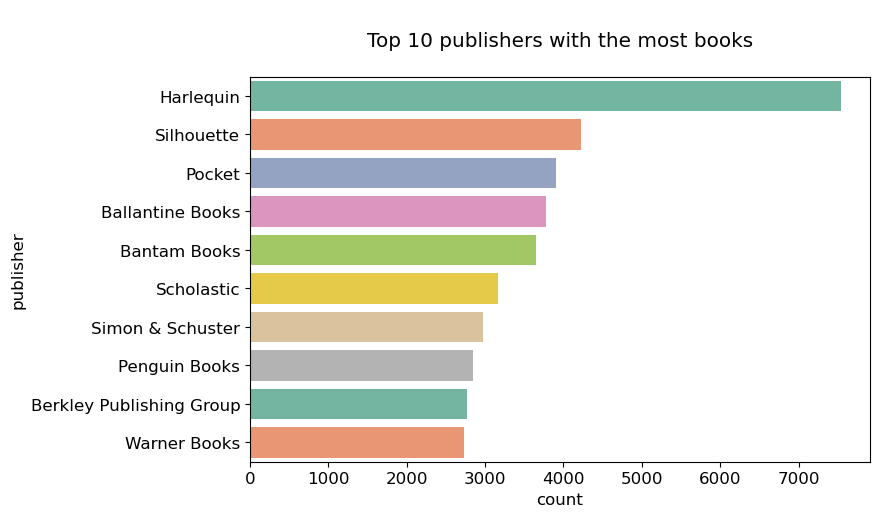

In [36]:
# Publishers with the most books
publishers = book['publisher'].value_counts()
top_publishers = publishers.head(10).reset_index()
top_publishers.columns = ['publisher', 'count']
plt.figure(figsize=[8, 5])
plt.rc('font', size=12)
plt.title('\nTop 10 publishers with the most books\n')
sns.barplot(x=top_publishers['count'], y=top_publishers['publisher'],
            palette='Set2', )

In [37]:
book

,ISBN,title,author,year,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company
...,...,...,...,...,...
271374,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271375,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271376,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco
271377,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press


In [38]:
# defining a function to extarct the country names
def get_country(x):
  return x.split(',')[-1]

In [39]:
# Applying the function the location column
df_location = user.copy(deep=True)
df_location['country'] = user['location'].apply(get_country)
df_location

,user_id,location,age,country
0,1,"nyc, new york, usa",34,usa
1,2,"stockton, california, usa",18,usa
2,3,"moscow, yukon territory, russia",34,russia
3,4,"porto, v.n.gaia, portugal",17,portugal
4,5,"farnborough, hants, united kingdom",34,united kingdom
...,...,...,...,...
278853,278854,"portland, oregon, usa",34,usa
278854,278855,"tacoma, washington, united kingdom",50,united kingdom
278855,278856,"brampton, ontario, canada",34,canada
278856,278857,"knoxville, tennessee, usa",34,usa


In [40]:
# Identifying what % of customers are coming from different countries
df_location = pd.DataFrame(df_location.country.value_counts(normalize=True)).reset_index()
df_location.columns = ['countries','value_counts']

# Labeling countries with low customer % as other
df_location['countries'] = df_location.apply(lambda x: 'other' if (x['value_counts'] < 0.02 or x['countries'] == '') else x['countries'],axis=1)

# Grouping the customer % from 'other' countries 
df_location = df_location.groupby('countries')['value_counts'].sum().reset_index()
df_location = df_location.sort_values(by='value_counts')

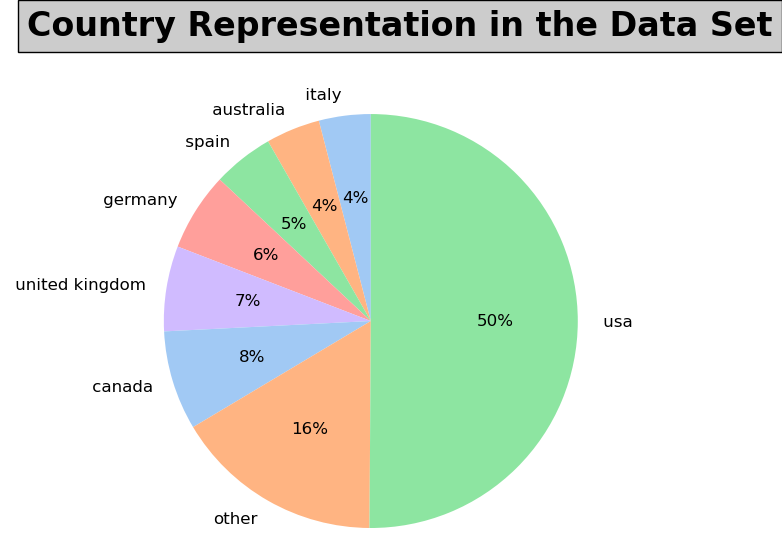

In [41]:
# Define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

# Create pie chart
plt.title("Country Representation in the Data Set",bbox={'facecolor':'0.8', 'pad':4},fontsize=24, fontdict={"weight": "bold"},y=1.25,x=0.578)
f = plt.pie(df_location['value_counts'], labels = df_location['countries'], colors = colors, autopct='%.0f%%',radius=1.4, startangle=90)
